<a href="https://colab.research.google.com/github/deNzik3/data_analytics_projects/blob/main/movie_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [26]:
#libraries for data analysis
import numpy as np
import pandas as pd
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



#Loading data

In [27]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')

# Data cleaning

**Let's create a summary function for analysis**

In [28]:
def summary(df):
  print(f'data shape: {df.shape}')
  summ = pd.DataFrame(df.dtypes, columns=['data type'])
  summ['#missing'] = df.isnull().sum().values * 100
  summ['%missing'] = df.isnull().sum().values / len(df)
  summ['#unique'] = df.nunique().values
  summ['#duplicates'] = df.duplicated().count()
  desc = pd.DataFrame(df.describe(include='all').transpose())
  summ['min'] = desc['min'].values
  summ['max'] = desc['max'].values
  summ['first value'] = df.loc[0].values
  summ['second value'] = df.loc[1].values
  summ['third value'] = df.loc[2].values

  return summ

In [29]:
summary(df)

data shape: (4803, 20)


,data type,#missing,%missing,#unique,#duplicates,min,max,first value,second value,third value
budget,int64,0,0.000000,436,4803,0.0,380000000.0,237000000,300000000,245000000
genres,object,0,0.000000,1175,4803,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,object,309100,0.643556,1691,4803,NaN,NaN,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/
id,int64,0,0.000000,4803,4803,5.0,459488.0,19995,285,206647
keywords,object,0,0.000000,4222,4803,NaN,NaN,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
original_language,object,0,0.000000,37,4803,NaN,NaN,en,en,en
original_title,object,0,0.000000,4801,4803,NaN,NaN,Avatar,Pirates of the Caribbean: At World's End,Spectre
overview,object,300,0.000625,4800,4803,NaN,NaN,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...
popularity,float64,0,0.000000,4802,4803,0.0,875.581305,150.437577,139.082615,107.376788
production_companies,object,0,0.000000,3697,4803,NaN,NaN,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."


**As we see we have some missing values**

**Fill in the missing values**

In [30]:
df.tagline = df.tagline.fillna('')
df.homepage = df.homepage.fillna('')

In [31]:
df.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**Let's find out NaN values**

In [32]:
df[df.overview.isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,Food Chains,7.4,8


**Fill in empty values**

In [33]:
df.overview = df.overview.fillna("")

In [34]:
df.runtime = df.runtime.fillna(df.runtime.mean())

In [35]:
df.release_date = df.release_date.fillna("")

In [36]:
df.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**As we see, that was pretty easy to clean up this dataset. Let's move on to the EDA**

# EDA + visualization

In [37]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [38]:
print("The average film runtime:",df.runtime.mean())

The average film runtime: 106.87585919600083


In [39]:
df.status.value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [40]:
print("Top 5 films by rating")
df.sort_values(by = 'vote_average',ascending = False)[['title','vote_average']][:5]

Top 5 films by rating


,title,vote_average
3519,Stiff Upper Lips,10.0
4247,Me You and Five Bucks,10.0
4045,"Dancer, Texas Pop. 81",10.0
4662,Little Big Top,10.0
3992,Sardaarji,9.5


In [41]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [42]:
print("The average film budget:", df.budget.mean() / 1000000,'mln')
print("The biggest film budget:", df.budget.max() / 1000000,'mln')
print("The lowest film budget:", df.budget.min() / 1000000,'mln')

The average film budget: 29.04503987528628 mln
The biggest film budget: 380.0 mln
The lowest film budget: 0.0 mln


Text(0.5, 1.0, 'Film budget histogram')

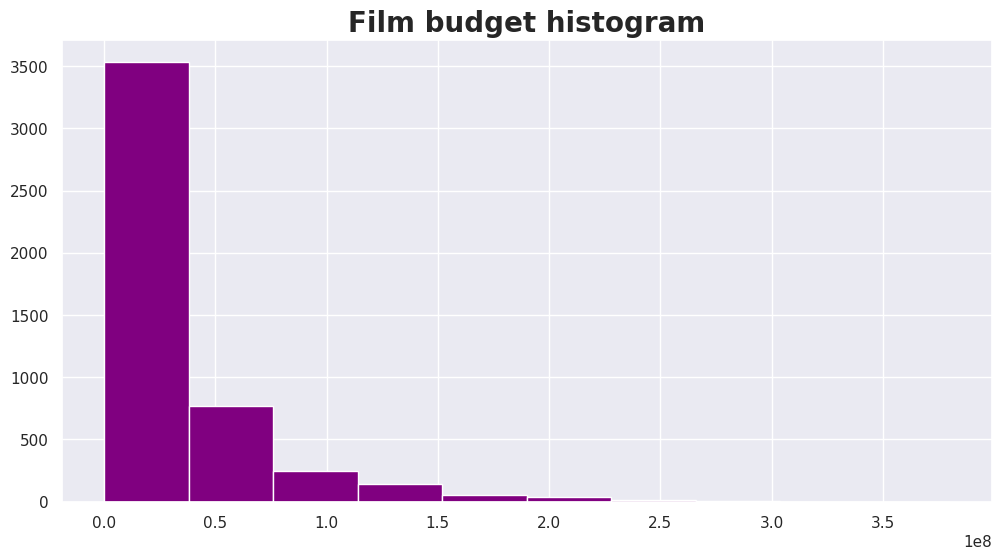

In [43]:
plt.figure(figsize = (12,6))
fig = df.budget.hist(color = 'purple'
               )
plt.title("Film budget histogram",
          weight = 'heavy',
          size = 20)

In [44]:
data = df[['title','budget']].sort_values(by = 'budget',ascending = False)[:5]
data = data[::-1]
data

,title,budget
4,John Carter,260000000
10,Superman Returns,270000000
7,Avengers: Age of Ultron,280000000
1,Pirates of the Caribbean: At World's End,300000000
17,Pirates of the Caribbean: On Stranger Tides,380000000


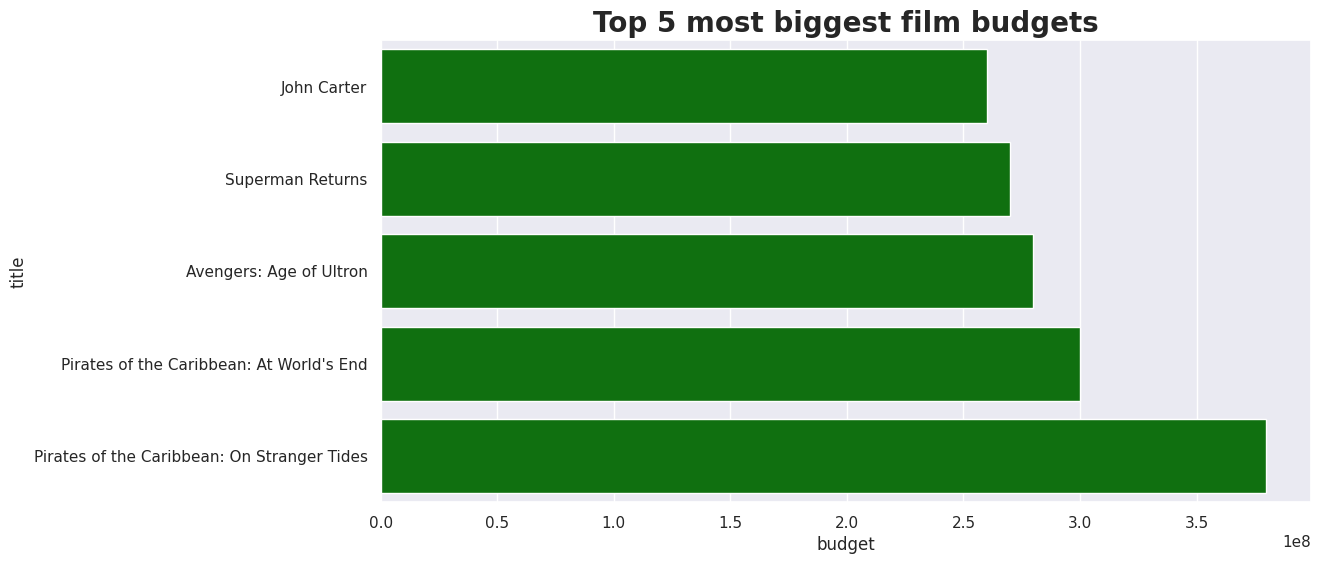

In [45]:
plt.figure(figsize = (12,6))



plt.title("Top 5 most biggest film budgets",weight = 'heavy',size = 20)
sns.barplot(data = data, x = 'budget',y = 'title', color = 'green')

plt.show()

In [46]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [47]:
print("The most popular film is:",df[df['popularity'] == df.popularity.max()]['title'])

The most popular film is: 546    Minions
Name: title, dtype: object


In [48]:
df[df['vote_count'] > 5000][['title','budget','revenue','vote_average']].sort_values(by = 'vote_average',ascending = False)[:10]

,title,budget,revenue,vote_average
1881,The Shawshank Redemption,25000000,28341469,8.5
3337,The Godfather,6000000,245066411,8.4
3232,Pulp Fiction,8000000,213928762,8.3
662,Fight Club,63000000,100853753,8.3
65,The Dark Knight,185000000,1004558444,8.2
1990,The Empire Strikes Back,18000000,538400000,8.2
809,Forrest Gump,55000000,677945399,8.2
2912,Star Wars,11000000,775398007,8.1
329,The Lord of the Rings: The Return of the King,94000000,1118888979,8.1
1553,Se7en,33000000,327311859,8.1


In [49]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [50]:
data = df[['title','runtime']].sort_values(by = 'runtime', ascending = False)[:5]
data = data[::-1]
data

,title,runtime
2373,Hamlet,242.0
1125,Cleopatra,248.0
1922,Gettysburg,254.0
2631,The Company,276.0
2384,Carlos,338.0


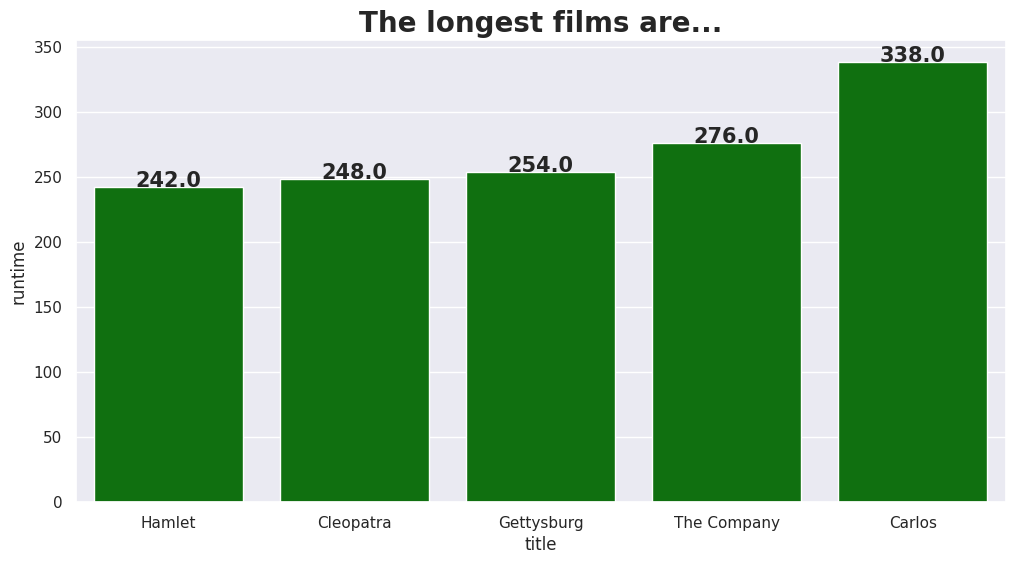

In [53]:
plt.figure(figsize = (12,6))
plt.title("The longest films are...",weight = 'heavy',size = 20)


sns.barplot(data = data, x = 'title', y = 'runtime',color = 'green')

for i,v in enumerate(data["runtime"]):

  plt.text(i,v,str(v),ha = 'center',weight = 'bold',size = 15)


In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df.production_countries = df.production_countries.apply(fetch_name)

In [ ]:
df.production_countries = df.production_countries.apply(lambda x: " ".join(x))

In [ ]:
data = df.production_countries.value_counts()
data

United States of America                                  2977
United Kingdom United States of America                    181
                                                           174
United Kingdom                                             131
Germany United States of America                           119
                                                          ... 
United Kingdom France United States of America               1
United States of America South Africa                        1
France Iceland United Kingdom United States of America       1
Canada South Korea                                           1
United States of America China                               1
Name: production_countries, Length: 469, dtype: int64

In [ ]:
import ast

def fetch_name(obj):
  
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

# Dataset preparing

In [ ]:
fdd = df[['id','title','genres','keywords','tagline','overview','vote_average']].copy()

In [ ]:
fdd.head()

,id,title,genres,keywords,tagline,overview,vote_average
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",7.2
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",6.9
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,6.3
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Legend Ends,Following the death of District Attorney Harve...,7.6
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","Lost in our world, found in another.","John Carter is a war-weary, former military ca...",6.1


In [ ]:
fdd['genres'] = fdd.genres.apply(fetch_name)
fdd['keywords'] = fdd.keywords.apply(fetch_name)

In [ ]:
fdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   keywords      4803 non-null   object 
 4   tagline       4803 non-null   object 
 5   overview      4803 non-null   object 
 6   vote_average  4803 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 262.8+ KB


In [ ]:
fdd.overview = fdd.overview.apply(lambda x: x.split())

In [ ]:
fdd.head()

,id,title,genres,keywords,tagline,overview,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Enter the World of Pandora.,"[In, the, 22nd, century,, a, paraplegic, Marin...",7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","At the end of the world, the adventure begins.","[Captain, Barbossa,, long, believed, to, be, d...",6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A Plan No One Escapes,"[A, cryptic, message, from, Bond’s, past, send...",6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Legend Ends,"[Following, the, death, of, District, Attorney...",7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","Lost in our world, found in another.","[John, Carter, is, a, war-weary,, former, mili...",6.1


In [ ]:
fdd['tags'] = fdd['genres'] + fdd['keywords'] + fdd['overview']

In [ ]:
fdd.head()

,id,title,genres,keywords,tagline,overview,vote_average,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Enter the World of Pandora.,"[In, the, 22nd, century,, a, paraplegic, Marin...",7.2,"[Action, Adventure, Fantasy, Science Fiction, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","At the end of the world, the adventure begins.","[Captain, Barbossa,, long, believed, to, be, d...",6.9,"[Adventure, Fantasy, Action, ocean, drug abuse..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A Plan No One Escapes,"[A, cryptic, message, from, Bond’s, past, send...",6.3,"[Action, Adventure, Crime, spy, based on novel..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Legend Ends,"[Following, the, death, of, District, Attorney...",7.6,"[Action, Crime, Drama, Thriller, dc comics, cr..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","Lost in our world, found in another.","[John, Carter, is, a, war-weary,, former, mili...",6.1,"[Action, Adventure, Science Fiction, based on ..."


In [ ]:
new_df = fdd[["title","tags","vote_average"]].copy()

In [ ]:
new_df.head()

,title,tags,vote_average
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction, ...",7.2
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drug abuse...",6.9
2,Spectre,"[Action, Adventure, Crime, spy, based on novel...",6.3
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dc comics, cr...",7.6
4,John Carter,"[Action, Adventure, Science Fiction, based on ...",6.1


In [ ]:
new_df.tags = new_df.tags.apply(lambda x: ' '.join(x))
new_df.tags = new_df.tags.apply(lambda x: x.lower())

In [ ]:
new_df.head()

,title,tags,vote_average
0,Avatar,action adventure fantasy science fiction cultu...,7.2
1,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drug abuse exot...,6.9
2,Spectre,action adventure crime spy based on novel secr...,6.3
3,The Dark Knight Rises,action crime drama thriller dc comics crime fi...,7.6
4,John Carter,action adventure science fiction based on nove...,6.1


#Recommendation system

In [ ]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer(lowercase= True)

tfidf = vectorizer.fit_transform(new_df['tags'])

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
def search(title):

  tags = new_df[new_df['title'] == title]['tags']
  query_vec = vectorizer.transform(tags)

  similarity = cosine_similarity(query_vec,tfidf).flatten()

  indices = np.argpartition(similarity,-5)[-5:]

  result = new_df.loc[indices][::-1]

  return result

In [ ]:
movie_input = widgets.Text(
  value = "Type here",
  description = "Movie Title:",    
  disabled = False


)
movie_list = widgets.Output()

In [ ]:
def on_type(data):

  with movie_list:
    movie_list.clear_output()

    title = data['new']

    if len(title) > 5:
      display(search(title))


movie_input.observe(on_type, names = 'value')


display(movie_input,movie_list)

Text(value='Type here', description='Movie Title:')

Output()